In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('Data_for_UCI_named.csv')

In [3]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
tau1     10000 non-null float64
tau2     10000 non-null float64
tau3     10000 non-null float64
tau4     10000 non-null float64
p1       10000 non-null float64
p2       10000 non-null float64
p3       10000 non-null float64
p4       10000 non-null float64
g1       10000 non-null float64
g2       10000 non-null float64
g3       10000 non-null float64
g4       10000 non-null float64
stab     10000 non-null float64
stabf    10000 non-null object
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [6]:
df=df.drop(columns="stab", axis=1)

In [7]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [8]:
df.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stabf'],
      dtype='object')

In [9]:
X = df.drop(columns='stabf')
y=df['stabf']

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

y_train.value_counts()

unstable    5092
stable      2908
Name: stabf, dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()

x_train_scaled= scaler.fit_transform(x_train)
x_train_scaled= pd.DataFrame(x_train)

#y_train_scaled = scaler.fit_transform(y_train)
x_test_scaled= scaler.transform(x_test)
x_test_scaled= pd.DataFrame(x_test)

### Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

RFR= RandomForestClassifier(random_state=1)

RFR.fit(x_train_scaled, y_train)

pred_rf=RFR.predict(x_test_scaled)

In [17]:
plot_confusion_matrix(RFR, 
                      x_test_scaled, 
                      y_test, 
                      display_labels=["stable", "unstable"])

In [18]:
print(classification_report(y_test,pred_rf, digits=4))

              precision    recall  f1-score   support

      stable     0.9191    0.8778    0.8980       712
    unstable     0.9341    0.9573    0.9456      1288

    accuracy                         0.9290      2000
   macro avg     0.9266    0.9176    0.9218      2000
weighted avg     0.9288    0.9290    0.9286      2000



#### Evaluation of Random Forest

In [19]:
accuracy_rf = accuracy_score(y_true=y_test, y_pred=pred_rf)
print('Accuracy: {}'.format(round(accuracy_rf*100), 3))

Accuracy: 93.0


In [20]:
precision_rf = precision_score(y_true=y_test, y_pred=pred_rf, pos_label='stable')
print('Precision: {}'.format(round(precision_rf*100), 4))

Precision: 92.0


In [21]:
recall_rf = recall_score(y_true=y_test, y_pred=pred_rf, pos_label='stable')
print('Recall: {}'.format(round(recall_rf*100), 3)) 

Recall: 88.0


In [22]:
f1_rf = f1_score(y_true=y_test, y_pred=pred_rf, pos_label='stable')
print('F1: {}'.format(round(f1_rf*100), 3))

F1: 90.0


In [23]:
print(classification_report(y_test,pred_rf, digits=4))

              precision    recall  f1-score   support

      stable     0.9191    0.8778    0.8980       712
    unstable     0.9341    0.9573    0.9456      1288

    accuracy                         0.9290      2000
   macro avg     0.9266    0.9176    0.9218      2000
weighted avg     0.9288    0.9290    0.9286      2000



## Extra Tree Classifier

In [24]:
from sklearn.ensemble import ExtraTreesClassifier

etc=ExtraTreesClassifier(random_state=1)

etc.fit(x_train_scaled, y_train)

pred_etc= etc.predict(x_test_scaled)

In [25]:
con_etc= confusion_matrix(y_test, pred_etc)

con_etc

array([[ 606,  106],
       [  38, 1250]], dtype=int64)

In [26]:
print(classification_report(y_test,pred_etc, digits=4))

              precision    recall  f1-score   support

      stable     0.9410    0.8511    0.8938       712
    unstable     0.9218    0.9705    0.9455      1288

    accuracy                         0.9280      2000
   macro avg     0.9314    0.9108    0.9197      2000
weighted avg     0.9287    0.9280    0.9271      2000



In [27]:
accuracy_etc = accuracy_score(y_true=y_test, y_pred=pred_etc)
print('Accuracy: {}'.format(round(accuracy_etc*100), 2))


precision_etc = precision_score(y_true=y_test, y_pred=pred_etc, pos_label='stable')
print('Precision: {}'.format(round(precision_etc*100), 2))


recall_etc = recall_score(y_true=y_test, y_pred=pred_etc, pos_label='stable')
print('Recall: {}'.format(round(recall_etc*100), 2)) 

f1_etc = f1_score(y_true=y_test, y_pred=pred_etc, pos_label='stable')
print('F1: {}'.format(round(f1_etc*100), 2))

Accuracy: 93.0
Precision: 94.0
Recall: 85.0
F1: 89.0


### Improving Extra Tree Classifier

In [28]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None]
hyperparameter_grid = {'n_estimators': n_estimators,'min_samples_leaf': min_samples_leaf,'min_samples_split': min_samples_split,
                       'max_features': max_features}

rsc = RandomizedSearchCV(estimator=ExtraTreesClassifier(random_state=1),
                            param_distributions=hyperparameter_grid,random_state=1)
result = rsc.fit(x_train_scaled, y_train)

print('Best Score: ', result.best_score_)
print('Best Params: ', result.best_params_)

Best Score:  0.9241249999999999
Best Params:  {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': None}


In [45]:
etc_improv = ExtraTreesClassifier(random_state=1, n_estimators=1000, min_samples_split= 2, min_samples_leaf=8,
                                 max_features=None)

etc_improv.fit(x_train_scaled, y_train)
pred_etc_improv=etc_improv.predict(x_test)


In [46]:
con_matrix_etc_improv = confusion_matrix(y_test, pred_etc_improv)

con_matrix_etc_improv

array([[ 619,   93],
       [  53, 1235]], dtype=int64)

In [47]:
class_etc_improv =  classification_report(y_test,pred_etc_improv)

print (class_etc_improv)

              precision    recall  f1-score   support

      stable       0.92      0.87      0.89       712
    unstable       0.93      0.96      0.94      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.91      0.92      2000
weighted avg       0.93      0.93      0.93      2000



In [32]:
accuracy_etc_improv = accuracy_score(y_true=y_test, y_pred=pred_etc_improv)
print('Accuracy: {}'.format(round(accuracy_etc_improv*100), 2))


precision_etc_improv = precision_score(y_true=y_test, y_pred=pred_etc_improv, pos_label='stable')
print('Precision: {}'.format(round(precision_etc_improv*100), 2))


recall_etc_improv = recall_score(y_true=y_test, y_pred=pred_etc_improv, pos_label='stable')
print('Recall: {}'.format(round(recall_etc_improv*100), 2)) 

f1_etc_improv = f1_score(y_true=y_test, y_pred=pred_etc_improv, pos_label='stable')
print('F1: {}'.format(round(f1_etc_improv*100), 2))

Accuracy: 91.0
Precision: 98.0
Recall: 77.0
F1: 86.0


## ----------------------------------------------------------------------------------

## XGB Classifier2

In [37]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=1, max_depth=3, learning_rate=0.1)
xgb.fit(x_train_scaled, y_train)

pred_xgb2 = xgb.predict(x_test_scaled)

In [38]:
cnf_mat_xgb2 = confusion_matrix(y_true=y_test, y_pred=pred_xgb2)

cnf_mat_xgb2

array([[ 603,  109],
       [  52, 1236]], dtype=int64)

In [39]:
print(classification_report(y_test,pred_xgb2, digits =4))

              precision    recall  f1-score   support

      stable     0.9206    0.8469    0.8822       712
    unstable     0.9190    0.9596    0.9389      1288

    accuracy                         0.9195      2000
   macro avg     0.9198    0.9033    0.9105      2000
weighted avg     0.9195    0.9195    0.9187      2000



In [40]:
accuracy_xgb2 = accuracy_score(y_true=y_test, y_pred=pred_xgb2)
print('Accuracy: {}'.format(accuracy_xgb2*100))


precision_xgb2 = precision_score(y_true=y_test, y_pred=pred_xgb2, pos_label='stable')
print('Precision: {}'.format(precision_xgb2*100))


recall_xgb2 = recall_score(y_true=y_test, y_pred=pred_xgb2, pos_label='stable')
print('Recall: {}'.format(recall_xgb2*100)) 

f1_xgb2 = f1_score(y_true=y_test, y_pred=pred_xgb2, pos_label='stable')
print('F1: {}'.format(f1_xgb2*100))

Accuracy: 91.95
Precision: 92.06106870229007
Recall: 84.69101123595506
F1: 88.22238478419898


## LGBM Classifier

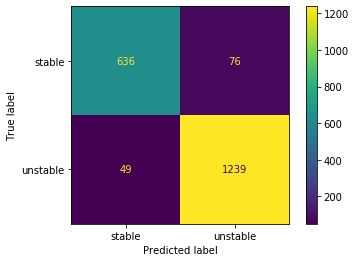

In [41]:
from lightgbm import LGBMClassifier

lgm = LGBMClassifier(random_state=1)

# fit the model on the whole dataset

lgm.fit(x_train_scaled, y_train)
plot_confusion_matrix(lgm, 
                      x_test_scaled, 
                      y_test, 
                      display_labels=["stable", "unstable"])

pred_lgm= lgm.predict(x_test_scaled)

In [42]:
print(classification_report(y_test,pred_lgm))

              precision    recall  f1-score   support

      stable       0.93      0.89      0.91       712
    unstable       0.94      0.96      0.95      1288

    accuracy                           0.94      2000
   macro avg       0.94      0.93      0.93      2000
weighted avg       0.94      0.94      0.94      2000



In [43]:
accuracy_lgm = accuracy_score(y_true=y_test, y_pred=pred_lgm)
print('Accuracy: {}'.format(accuracy_lgm*100))


precision_lgm = precision_score(y_true=y_test, y_pred=pred_lgm, pos_label='stable')
print('Precision: {}'.format(precision_lgm*100))


recall_lgm = recall_score(y_true=y_test, y_pred=pred_lgm, pos_label='stable')
print('Recall: {}'.format(recall_lgm*100)) 

f1_lgm = f1_score(y_true=y_test, y_pred=pred_lgm, pos_label='stable')
print('F1: {}'.format(f1_lgm*100))

Accuracy: 93.75
Precision: 92.84671532846716
Recall: 89.32584269662921
F1: 91.05225483178239


## Feature Importance

In [48]:
etc_improv.feature_importances_

array([0.13723979, 0.14050787, 0.1346805 , 0.13541662, 0.00368361,
       0.0053368 , 0.00542927, 0.0049625 , 0.10256224, 0.1075776 ,
       0.11306257, 0.10954062])

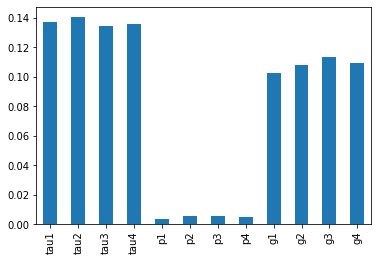

In [59]:


feat_graph = pd.Series(etc_improv.feature_importances_, index=X.columns)
feat_graph.plot(kind='bar')